## NETWORK INTRUSION DETECTION

### importing the modules

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

### importing the datasets

In [3]:
files=['Data_of_Attack_Back','Data_of_Attack_Back_BufferOverflow','Data_of_Attack_Back_FTPWrite','Data_of_Attack_Back_GuessPassword','Data_of_Attack_Back_Neptune','Data_of_Attack_Back_NMap','Data_of_Attack_Back_Normal','Data_of_Attack_Back_PortSweep','Data_of_Attack_Back_RootKit','Data_of_Attack_Back_Satan','Data_of_Attack_Back_Smurf']

In [4]:
for i in files:
    globals()[i]=pd.read_csv("C:\\Users\\Aniket Aggarwal\\OneDrive\\Desktop\\an\\ML\\12. Capstone Case Study - Cyber Security Case Study\\Datasets\\" + i +'.csv' )

In [5]:
for i in files:
    globals()[i]['Type']= i

### data audit

In [6]:
for i in files:
    print(i,'shape :-  ',globals()[i].shape)

Data_of_Attack_Back shape :-   (968, 42)
Data_of_Attack_Back_BufferOverflow shape :-   (30, 42)
Data_of_Attack_Back_FTPWrite shape :-   (7, 42)
Data_of_Attack_Back_GuessPassword shape :-   (53, 42)
Data_of_Attack_Back_Neptune shape :-   (227228, 42)
Data_of_Attack_Back_NMap shape :-   (1554, 42)
Data_of_Attack_Back_Normal shape :-   (576710, 42)
Data_of_Attack_Back_PortSweep shape :-   (2964, 42)
Data_of_Attack_Back_RootKit shape :-   (10, 42)
Data_of_Attack_Back_Satan shape :-   (5019, 42)
Data_of_Attack_Back_Smurf shape :-   (3007, 42)


In [7]:
combined_data = pd.concat([Data_of_Attack_Back,Data_of_Attack_Back_BufferOverflow,
                           Data_of_Attack_Back_FTPWrite,Data_of_Attack_Back_GuessPassword,
                           Data_of_Attack_Back_Neptune,Data_of_Attack_Back_NMap,Data_of_Attack_Back_Normal,
                           Data_of_Attack_Back_PortSweep,
                           Data_of_Attack_Back_RootKit,Data_of_Attack_Back_Satan,Data_of_Attack_Back_Smurf],axis=0)


In [8]:
combined_data.reset_index(drop=True, inplace=True)

In [9]:
combined_data.drop(['0.0026', ' 0', ' 0.07', ' 0.3',
       ' 0.00116', ' 0.00451', ' 0.4', ' 0.5', ' 0.6', ' 0.2', ' 0.7', ' 0.1',
       ' 0.8', ' 0.9', ' 0.10', ' 0.11', ' 0.1.1', ' 0.12', ' 0.1.2', ' 0.13',
       ' 0.14', ' 0.1.3', ' 0.001', ' 0.001.1', ' 0.15', ' 0.16', ' 0.17',
       ' 0.18', ' 0.1.4', ' 0.19', ' 0.20', ' 0.001.2', ' 0.001.3', ' 0.1.5',
       ' 0.21', ' 0.1.6', ' 0.22', ' 0.23', ' 0.24', ' 0.25', ' 0.26'],axis=1,inplace=True) ### dropping the unnecessary columns

In [10]:
combined_data.columns

Index(['duration', ' protocol_type', ' service', ' flag', ' src_bytes',
       ' dst_bytes', ' land', ' wrong_fragment', ' urgent', ' hot',
       ' num_failed_logins', ' logged_in', ' num_compromised', ' root_shell',
       ' su_attempted', ' num_root', ' num_file_creations', ' num_shells',
       ' num_access_files', ' num_outbound_cmds', ' is_host_login',
       ' is_guest_login', ' count', ' srv_count', ' serror_rate',
       ' srv_error_rate', ' rerror_rate', ' srv_rerror_rate', ' same_srv_rate',
       ' diff_srv_rate', ' srv_diff_host_rate', ' dst_host_count',
       ' dst_host_srv_count', ' dst_host_same_srv_rate',
       ' dst_host_diff_srv_rate', ' dst_host_same_src_port_rate',
       ' dst_host_srv_diff_host_rate', ' dst_host_serror_rate',
       ' dst_host_srv_serror_rate', ' dst_host_rerror_rate',
       ' dst_host_srv_rerror_rate', 'Type'],
      dtype='object')

In [11]:
combined_data.shape

(817550, 42)

In [12]:
combined_data.dtypes

duration                        float64
 protocol_type                  float64
 service                        float64
 flag                           float64
 src_bytes                      float64
 dst_bytes                      float64
 land                           float64
 wrong_fragment                 float64
 urgent                         float64
 hot                            float64
 num_failed_logins              float64
 logged_in                      float64
 num_compromised                float64
 root_shell                     float64
 su_attempted                   float64
 num_root                       float64
 num_file_creations             float64
 num_shells                     float64
 num_access_files               float64
 num_outbound_cmds              float64
 is_host_login                  float64
 is_guest_login                 float64
 count                          float64
 srv_count                      float64
 serror_rate                    float64


In [13]:
combined_data.nunique()


duration                          918
 protocol_type                      3
 service                           67
 flag                              11
 src_bytes                       5908
 dst_bytes                      18398
 land                               1
 wrong_fragment                     2
 urgent                             5
 hot                               11
 num_failed_logins                  6
 logged_in                          2
 num_compromised                   11
 root_shell                         2
 su_attempted                       3
 num_root                          11
 num_file_creations                11
 num_shells                         3
 num_access_files                   9
 num_outbound_cmds                  1
 is_host_login                      2
 is_guest_login                     2
 count                            512
 srv_count                        512
 serror_rate                       96
 srv_error_rate                    75
 rerror_rate

In [14]:
combined_data.duplicated(subset=['duration', ' protocol_type', ' service', ' flag', ' src_bytes',
       ' dst_bytes', ' land', ' wrong_fragment', ' urgent', ' hot',
       ' num_failed_logins', ' logged_in', ' num_compromised', ' root_shell',
       ' su_attempted', ' num_root', ' num_file_creations', ' num_shells',
       ' num_access_files', ' num_outbound_cmds', ' is_host_login',
       ' is_guest_login', ' count', ' srv_count', ' serror_rate',
       ' srv_error_rate', ' rerror_rate', ' srv_rerror_rate', ' same_srv_rate',
       ' diff_srv_rate', ' srv_diff_host_rate', ' dst_host_count',
       ' dst_host_srv_count', ' dst_host_same_srv_rate',
       ' dst_host_diff_srv_rate', ' dst_host_same_src_port_rate',
       ' dst_host_srv_diff_host_rate', ' dst_host_serror_rate',
       ' dst_host_srv_serror_rate', ' dst_host_rerror_rate',
       ' dst_host_srv_rerror_rate']).sum()

8

In [15]:
combined_data.dropna(inplace=True)  #### getting rid of missing value data, since whole row is contains NaN hence we drop it.

In [17]:
summ =combined_data.describe().T

In [23]:
summ['coeff']=summ['std']/summ['mean']

In [28]:
summ

,count,mean,std,min,25%,50%,75%,max,coeff
duration,817543.0,8.767842e-04,0.026636,0.0,0.000,0.00000,0.00000,1.000,30.378976
protocol_type,817543.0,5.696092e-04,0.002596,0.0,0.000,0.00000,0.00000,0.020,4.556912
service,817543.0,5.290758e-02,0.096388,0.0,0.000,0.00000,0.12000,0.670,1.821814
flag,817543.0,2.015980e-02,0.030960,0.0,0.000,0.00000,0.07000,0.100,1.535706
src_bytes,817543.0,4.961411e-03,0.033235,0.0,0.000,0.00217,0.00299,1.000,6.698650
dst_bytes,817543.0,2.486181e-02,0.066634,0.0,0.000,0.00367,0.01969,1.000,2.680160
land,817543.0,0.000000e+00,0.000000,0.0,0.000,0.00000,0.00000,0.000,NaN
wrong_fragment,817543.0,3.669532e-07,0.000332,0.0,0.000,0.00000,0.00000,0.300,904.180845
urgent,817543.0,2.201719e-06,0.000766,0.0,0.000,0.00000,0.00000,0.500,348.018146
hot,817543.0,2.455284e-03,0.041469,0.0,0.000,0.00000,0.00000,1.000,16.889653


### feature engineering 

In [39]:
summ[(summ['coeff']>30)|((summ['max']==0)&(summ['min']==0))] ## gettig columns with  coefficient of variationis greater than 30

,count,mean,std,min,25%,50%,75%,max,coeff
duration,817543.0,8.767842e-04,0.026636,0.0,0.0,0.0,0.0,1.0,30.378976
land,817543.0,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,0.0,NaN
wrong_fragment,817543.0,3.669532e-07,0.000332,0.0,0.0,0.0,0.0,0.3,904.180845
urgent,817543.0,2.201719e-06,0.000766,0.0,0.0,0.0,0.0,0.5,348.018146
num_failed_logins,817543.0,1.565667e-05,0.001618,0.0,0.0,0.0,0.0,0.5,103.331361
num_compromised,817543.0,2.749702e-04,0.010337,0.0,0.0,0.0,0.0,1.0,37.593353
root_shell,817543.0,3.070175e-05,0.001752,0.0,0.0,0.0,0.0,0.1,57.062662
su_attempted,817543.0,1.113091e-05,0.001412,0.0,0.0,0.0,0.0,0.2,126.851172
num_file_creations,817543.0,2.841441e-04,0.011741,0.0,0.0,0.0,0.0,1.0,41.321494
num_shells,817543.0,1.969315e-05,0.001412,0.0,0.0,0.0,0.0,0.2,71.693742


In [30]:
combined_data.columns

Index(['duration', ' protocol_type', ' service', ' flag', ' src_bytes',
       ' dst_bytes', ' land', ' wrong_fragment', ' urgent', ' hot',
       ' num_failed_logins', ' logged_in', ' num_compromised', ' root_shell',
       ' su_attempted', ' num_root', ' num_file_creations', ' num_shells',
       ' num_access_files', ' num_outbound_cmds', ' is_host_login',
       ' is_guest_login', ' count', ' srv_count', ' serror_rate',
       ' srv_error_rate', ' rerror_rate', ' srv_rerror_rate', ' same_srv_rate',
       ' diff_srv_rate', ' srv_diff_host_rate', ' dst_host_count',
       ' dst_host_srv_count', ' dst_host_same_srv_rate',
       ' dst_host_diff_srv_rate', ' dst_host_same_src_port_rate',
       ' dst_host_srv_diff_host_rate', ' dst_host_serror_rate',
       ' dst_host_srv_serror_rate', ' dst_host_rerror_rate',
       ' dst_host_srv_rerror_rate', 'Type'],
      dtype='object')

In [42]:
combined_data.drop(['duration',  ' wrong_fragment', ' urgent', ' num_failed_logins',
       ' num_compromised', ' root_shell', ' su_attempted',
       ' num_file_creations', ' num_shells',' num_outbound_cmds',
        ' land',
       ' is_host_login'],axis=1,inplace=True) ### removing the columns with less information information

In [46]:
corr_matrix = combined_data.corr()


C:\Users\Aniket Aggarwal\AppData\Local\Temp\ipykernel_14852\3178337731.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = combined_data.corr()


In [47]:
corr_matrix.to_excel('correlation matrix.xlsx')

In [50]:
combined_data.drop( [' dst_host_serror_rate'
 ,' dst_host_srv_serror_rate'
 ,' dst_host_rerror_rate'
 ,' serror_rate'
 ,' srv_error_rate'
 ,' same_srv_rate'],axis=1,inplace=True) #### removing the columns with high correlation 

In [51]:
combined_data

,protocol_type,service,flag,src_bytes,dst_bytes,hot,logged_in,num_root,num_access_files,is_guest_login,...,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_srv_rerror_rate,Type
0,0.00,0.00,0.0,0.54540,0.08314,0.2,0.1,0.0,0.0,0.0,...,0.0,0.100,0.001,0.001,0.100,0.000,0.100,0.0,0.0,Data_of_Attack_Back
1,0.00,0.00,0.0,0.54540,0.08314,0.2,0.1,0.0,0.0,0.0,...,0.0,0.067,0.002,0.002,0.100,0.000,0.050,0.0,0.0,Data_of_Attack_Back
2,0.00,0.00,0.0,0.54540,0.08314,0.2,0.1,0.0,0.0,0.0,...,0.0,0.050,0.003,0.003,0.100,0.000,0.033,0.0,0.0,Data_of_Attack_Back
3,0.00,0.00,0.0,0.54540,0.08314,0.2,0.1,0.0,0.0,0.0,...,0.0,0.000,0.004,0.004,0.100,0.000,0.025,0.0,0.0,Data_of_Attack_Back
4,0.00,0.00,0.0,0.54540,0.08314,0.2,0.1,0.0,0.0,0.0,...,0.0,0.000,0.005,0.005,0.100,0.000,0.020,0.0,0.0,Data_of_Attack_Back
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
817545,0.02,0.09,0.0,0.01032,0.00000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000,0.255,0.251,0.098,0.001,0.098,0.0,0.0,Data_of_Attack_Back_Smurf
817546,0.02,0.09,0.0,0.01032,0.00000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000,0.255,0.252,0.099,0.001,0.099,0.0,0.0,Data_of_Attack_Back_Smurf
817547,0.02,0.09,0.0,0.01032,0.00000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000,0.255,0.253,0.099,0.001,0.099,0.0,0.0,Data_of_Attack_Back_Smurf
817548,0.02,0.09,0.0,0.01032,0.00000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000,0.255,0.254,0.100,0.001,0.100,0.0,0.0,Data_of_Attack_Back_Smurf


### model buiding

###  Binominal classification

In [70]:
combined_data['attack']=np.where((combined_data.Type.isin(['Data_of_Attack_Back_Normal'])==True), 'normal', 'attack' )

In [72]:
combined_data.attack.value_counts()

normal    576710
attack    240833
Name: attack, dtype: int64

In [73]:
feature_columns=combined_data.columns.difference(['Type','attack'])

In [75]:
from sklearn.model_selection import train_test_split


train_X, test_X, train_y, test_y = train_test_split( combined_data[feature_columns],
                                                  combined_data['attack'],
                                                  test_size = 0.3,
                                                  random_state = 42 )

In [78]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy')
classifier.fit(train_X, train_y)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [79]:
y_pred = classifier.predict(test_X)
y_pre=classifier.predict(train_X)

In [80]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(train_y, y_pre)

from sklearn.metrics import accuracy_score 
print ("Accuracy : ", accuracy_score(train_y, y_pre))
cm 

Accuracy :  0.999991263018103


array([[168554,      4],
       [     1, 403721]], dtype=int64)

In [81]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_y, y_pred)

from sklearn.metrics import accuracy_score 
print ("Accuracy : ", accuracy_score(test_y, y_pred))
cm 

Accuracy :  0.9998899140922194


array([[ 72257,     18],
       [     9, 172979]], dtype=int64)

In [82]:
tree_cm = metrics.confusion_matrix( y_pred,test_y
                                 )

Text(0.5, 23.52222222222222, 'Predicted label')

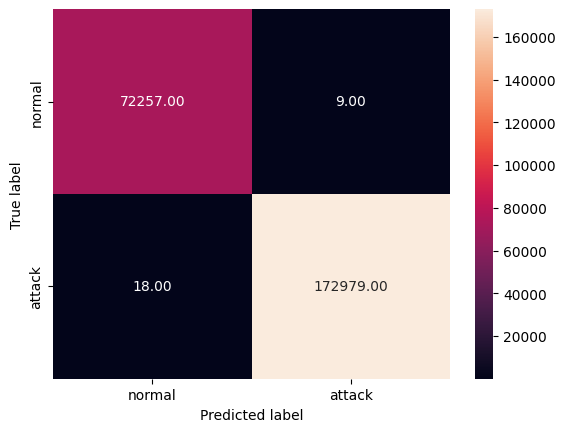

In [86]:
sn.heatmap(tree_cm, annot=True,
         fmt='.2f',xticklabels = ['normal','attack'] , yticklabels = ['normal','attack'] )

plt.ylabel('True label')
plt.xlabel('Predicted label')


### Multinomial classification

In [74]:
feature_columns=combined_data.columns.difference(['Type','attack'])

In [87]:
from sklearn.model_selection import train_test_split


train_X, test_X, train_y, test_y = train_test_split( combined_data[feature_columns],
                                                  combined_data['Type'],
                                                  test_size = 0.3,
                                                  random_state = 42 )

In [89]:
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [90]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy')
classifier.fit( train_X, train_y )


RandomForestClassifier(criterion='entropy', n_estimators=10)

In [91]:
y_pred = classifier.predict(test_X)
y_pre=classifier.predict(train_X)

In [100]:
from sklearn.metrics import accuracy_score 
print ("Accuracy : ", accuracy_score(train_y, y_pre))

Accuracy :  0.9999965052072413


In [99]:
from sklearn.metrics import accuracy_score 
print ("Accuracy : ", accuracy_score(test_y, y_pred))


Accuracy :  0.9998532187896259


In [94]:
df = pd.DataFrame({'Real_Values':np.array(test_y).reshape(-1), 'Predicted_Values':y_pred.reshape(-1)})
df[df.Real_Values!=df.Predicted_Values]

,Real_Values,Predicted_Values
730,Data_of_Attack_Back_Satan,Data_of_Attack_Back_Normal
9951,Data_of_Attack_Back_PortSweep,Data_of_Attack_Back_Normal
17565,Data_of_Attack_Back_Satan,Data_of_Attack_Back_PortSweep
34408,Data_of_Attack_Back_Satan,Data_of_Attack_Back_Normal
36855,Data_of_Attack_Back_RootKit,Data_of_Attack_Back_Normal
39927,Data_of_Attack_Back_Satan,Data_of_Attack_Back_Normal
51792,Data_of_Attack_Back_NMap,Data_of_Attack_Back_Normal
53428,Data_of_Attack_Back_Smurf,Data_of_Attack_Back_Normal
56513,Data_of_Attack_Back_Satan,Data_of_Attack_Back_Normal
63383,Data_of_Attack_Back_Satan,Data_of_Attack_Back_Normal


In [95]:
tree_cm = metrics.confusion_matrix( y_pred,test_y
                                 )

<Axes: >

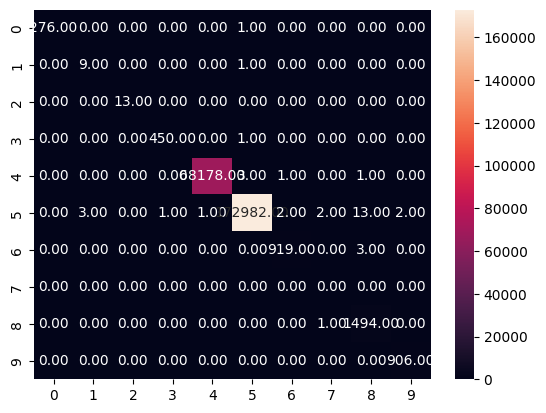

In [97]:
sn.heatmap(tree_cm, annot=True,
         fmt='.2f')